In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd

from src.data import get_dataloaders
from src.history import History
from src.utils import build_config, update_config, get_device
from src.models.modelzoo import get_model
from src.training import FederatedTrainer, SiloFederatedAveragingEnvironment

# Set the scenario
Feel free to adjust the parameters and explore some different scenarios.

In [2]:
#DATASET = 'MNIST'
DATASET = 'CIFAR10'
#DATASET = 'MedMNISTBlood'
#DATASET = 'MedMNISTDerma'
#DATASET = 'MedMNISTPneumonia'
#DATASET = 'MedMNISTRetina'

MODEL = 'CNN' 
#MODEL = 'ViT' 
#MODEL = 'ResNet18'

SEED = 42
COMMUNICATION_ROUNDS = 200
DEVICE = get_device()

GPU : Tesla V100-SXM2-16GB


# Training Demo

## Baseline Model

### Load and set configurations for training scenario, dataset and model

In [3]:
config = build_config('configs/main_config.yaml')
training_config = build_config('./configs/fedavg.yaml')
config = update_config(config, training_config)
data_config = build_config(f'./configs/data/{DATASET}.yaml')
config = update_config(config, data_config)
model_config = build_config(f'./configs/models/{MODEL}.yaml')
config = update_config(config, model_config)

config.seed = SEED
config.device = DEVICE
config.experiment_name = f'{DATASET}_{MODEL}_fedavg_seed{SEED}'


### Get dataloaders and model and setup the training environment

In [4]:
fed_data = get_dataloaders(DATASET, True, config)
config.data.use_val = list(fed_data[2].values())[0] is not None
model = get_model(config.model.name, config)
trainer = FederatedTrainer(model, config, config.device)
fed_env = SiloFederatedAveragingEnvironment(fed_data, trainer, config)
model

Using the following transformations for training data: Compose(
    ToTensor()
    Normalize(mean=tensor([[[0.4915]],

        [[0.4823]],

        [[0.4468]]]), std=tensor([[[0.2470]],

        [[0.2435]],

        [[0.2616]]]))
)
Using the following transformations for validation and test data: Compose(
    ToTensor()
    Normalize(mean=tensor([[[0.4915]],

        [[0.4823]],

        [[0.4468]]]), std=tensor([[[0.2470]],

        [[0.2435]],

        [[0.2616]]]))
)


Files already downloaded and verified
Files already downloaded and verified
Created central dataloaders for CIFAR10 dataset. Transformed them with:
None
Batchsize: 64 | Trainbatches: 781 | Testbatches: 157 | Validationbatches: 0
Splitting central dataset into federated client datasets with a IID partitioning!
Federated DataLoaders are built according to the following federated Datasets:
  Train FederatedDataset:
  Partition Mode: IID
  Clients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  Samples per Client: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
  Test FederatedDataset:
  Partition Mode: IID
  Clients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  Samples per Client: [996, 996, 996, 998, 996, 995, 995, 996, 997, 994]
  Validation {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None}
Creating validation split of 0.1 from training set for client 0
Client 0 | Trainbatches: 71 | Testbatches: 16 | Validationbatches: 8
Creating validation split of 0.1 from 

CNN(
  (conv_layers): ModuleList(
    (0): CNNBlock(
      (conv): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=valid)
      (activation_function): ReLU()
    )
    (1): CNNBlock(
      (conv): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=valid)
      (activation_function): ReLU()
    )
    (2): CNNBlock(
      (conv): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=valid)
      (activation_function): ReLU()
    )
  )
  (mlp_layers): ModuleList(
    (0): MLPBlock(
      (linear): Linear(in_features=64, out_features=10, bias=True)
      (regularization_layers): ModuleList()
    )
  )
)

### Train the model with Federated Averaging

In [5]:
fed_env.train(COMMUNICATION_ROUNDS)

### SiloFederatedAveragingEnvironment Training (START) ###
# Communication round 1 #
Execution of global_train_step took 0.30 minutes.
# Model performance in communication round 1: TotalExchangedModels: 20.0 | VAL_Accuracy: 0.30840000212192537 | VAL_Accuracy_WEIGHTED: 0.30840000212192537 | VAL_CrossEntropy_L: 1.935343012213707 | VAL_CrossEntropy_L_WEIGHTED: 1.935343012213707 | TST_Accuracy: 0.32664458453655243 | TST_Accuracy_WEIGHTED: 0.32663922142474955 | TST_CrossEntropy_L: 1.9343587078154088 | TST_CrossEntropy_L_WEIGHTED: 1.9343663683386139 #
# Communication round 2 #
Execution of global_train_step took 0.26 minutes.
# Model performance in communication round 2: TotalExchangedModels: 40.0 | VAL_Accuracy: 0.3856000006198883 | VAL_Accuracy_WEIGHTED: 0.3856000006198883 | VAL_CrossEntropy_L: 1.6849471420049666 | VAL_CrossEntropy_L_WEIGHTED: 1.6849471420049666 | TST_Accuracy: 0.4043558269739151 | TST_Accuracy_WEIGHTED: 0.40435786605874796 | TST_CrossEntropy_L: 1.6658640563488007 | TST_Cr

## Model extended by CVB

### Load and set configurations for training scenario, dataset and model

In [6]:
config = build_config('configs/main_config.yaml')
training_config = build_config('./configs/fedavg.yaml')
config = update_config(config, training_config)
data_config = build_config(f'./configs/data/{DATASET}.yaml')
config = update_config(config, data_config)
model_config = build_config(f'./configs/models/{MODEL}CVB.yaml')
config = update_config(config, model_config)

config.seed = SEED
config.device = DEVICE
config.experiment_name = f'{DATASET}_{MODEL}CVB_fedavg_seed{SEED}'


### Get dataloaders and model and setup the training environment

In [7]:
fed_data = get_dataloaders(DATASET, True, config)
config.data.use_val = list(fed_data[2].values())[0] is not None
model = get_model(config.model.name, config)
trainer = FederatedTrainer(model, config, config.device)
fed_env = SiloFederatedAveragingEnvironment(fed_data, trainer, config)
model

Using the following transformations for training data: Compose(
    ToTensor()
    Normalize(mean=tensor([[[0.4915]],

        [[0.4823]],

        [[0.4468]]]), std=tensor([[[0.2470]],

        [[0.2435]],

        [[0.2616]]]))
)
Using the following transformations for validation and test data: Compose(
    ToTensor()
    Normalize(mean=tensor([[[0.4915]],

        [[0.4823]],

        [[0.4468]]]), std=tensor([[[0.2470]],

        [[0.2435]],

        [[0.2616]]]))
)


Files already downloaded and verified
Files already downloaded and verified
Created central dataloaders for CIFAR10 dataset. Transformed them with:
None
Batchsize: 64 | Trainbatches: 781 | Testbatches: 157 | Validationbatches: 0
Splitting central dataset into federated client datasets with a IID partitioning!
Federated DataLoaders are built according to the following federated Datasets:
  Train FederatedDataset:
  Partition Mode: IID
  Clients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  Samples per Client: [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
  Test FederatedDataset:
  Partition Mode: IID
  Clients: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  Samples per Client: [997, 995, 996, 996, 995, 998, 994, 997, 996, 995]
  Validation {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None}
Creating validation split of 0.1 from training set for client 0
Client 0 | Trainbatches: 71 | Testbatches: 16 | Validationbatches: 8
Creating validation split of 0.1 from 

VBCNN(
  (conv_layers): ModuleList(
    (0): CNNBlock(
      (conv): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=valid)
      (activation_function): ReLU()
    )
    (1): CNNBlock(
      (conv): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=valid)
      (activation_function): ReLU()
    )
    (2): CNNBlock(
      (conv): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=valid)
      (activation_function): ReLU()
    )
  )
  (mlp_layers): ModuleList(
    (0): MLPBlock(
      (linear): Linear(in_features=64, out_features=10, bias=True)
      (regularization_layers): ModuleList()
    )
  )
  (VB_list): ModuleList(
    (0): FullyConvolutionalVariationalBottleneck(
      (encoder): ConvolutionalVariationalEncoder(
        (mu_encoder): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=same, bias=False)
        (std_encoder): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=same, bias=False)
      )
      (decoder): ConvolutionalVariationalDeco

### Train the model with Federated Averaging

In [8]:
fed_env.train(COMMUNICATION_ROUNDS)

### SiloFederatedAveragingEnvironment Training (START) ###
# Communication round 1 #
Execution of global_train_step took 0.25 minutes.
# Model performance in communication round 1: TotalExchangedModels: 20.0 | VAL_Accuracy: 0.24580000191926957 | VAL_Accuracy_WEIGHTED: 0.24580000191926957 | VAL_VBLoss_L: 2.1224226385354994 | VAL_VBLoss_L_WEIGHTED: 2.1224226385354994 | TST_Accuracy: 0.24218795150518418 | TST_Accuracy_WEIGHTED: 0.242192992480635 | TST_VBLoss_L: 2.118855859339237 | TST_VBLoss_L_WEIGHTED: 2.1188576935701358 #
# Communication round 2 #
Execution of global_train_step took 0.25 minutes.
# Model performance in communication round 2: TotalExchangedModels: 40.0 | VAL_Accuracy: 0.33299999833106997 | VAL_Accuracy_WEIGHTED: 0.33299999833106997 | VAL_VBLoss_L: 1.8535679176449775 | VAL_VBLoss_L_WEIGHTED: 1.8535679176449775 | TST_Accuracy: 0.3366740494966507 | TST_Accuracy_WEIGHTED: 0.3366803947624067 | TST_VBLoss_L: 1.8489595726132393 | TST_VBLoss_L_WEIGHTED: 1.8489614641150804 #
# Co

# Comparison of the model utility

In [9]:
baseline_history = History(savefile=f'./histories/{DATASET}_{MODEL}_fedavg_seed{SEED}_GLOBAL.history')
baseline_history.load()

cvb_history = History(savefile=f'./histories/{DATASET}_{MODEL}CVB_fedavg_seed{SEED}_GLOBAL.history')
cvb_history.load()

baseline_history.df['Model'] = 'Baseline'
cvb_history.df['Model'] = 'CVB'
plot_df = pd.concat([baseline_history.df, cvb_history.df])

Text(0, 0.5, 'TST_Accuracy')

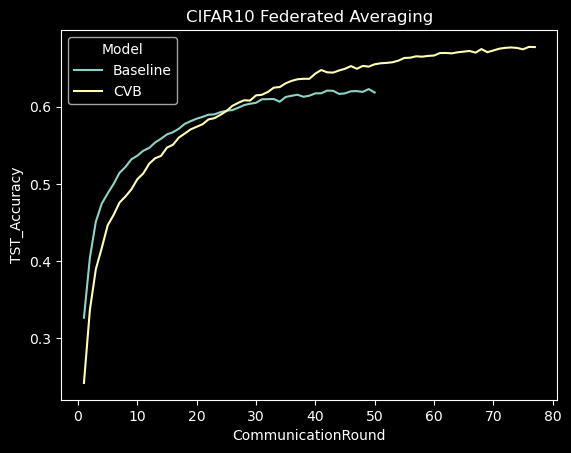

In [10]:
metric = 'TST_Accuracy'
ax = sns.lineplot(data = plot_df.query(f'Metric == "{metric}"'), x='CommunicationRound', y='Value', hue='Model')
ax.set_title(f'{DATASET} Federated Averaging')
ax.set_ylabel(metric)